<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.399589,65.612443,-5.443987,130.568045,135.924508,-5.356462
1,0.0,1.0,62.775828,26.149163,-2.775330,96.149660,98.856628,-2.706968
2,0.0,2.0,87.420954,77.906525,-1.180273,174.147206,175.643853,-1.496647
3,0.0,3.0,26.322587,40.259408,-1.090736,75.491259,75.981137,-0.489877
4,0.0,4.0,28.843359,30.435796,0.454599,69.733754,68.711550,1.022205
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.523265,35.933254,2.601255,114.057773,111.564160,2.493614
29996,999.0,26.0,22.050780,86.139799,-0.615558,117.575021,116.996667,0.578354
29997,999.0,27.0,42.395755,82.951096,-0.790012,134.556838,134.352684,0.204154
29998,999.0,28.0,84.111840,87.012987,0.071383,181.196210,180.326541,0.869669


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    60.399589  65.612443 -5.443987  130.568045  135.924508 -5.356462
      1.0    62.775828  26.149163 -2.775330   96.149660   98.856628 -2.706968
      2.0    87.420954  77.906525 -1.180273  174.147206  175.643853 -1.496647
      3.0    26.322587  40.259408 -1.090736   75.491259   75.981137 -0.489877
      4.0    28.843359  30.435796  0.454599   69.733754   68.711550  1.022205
...                ...        ...       ...         ...         ...       ...
999.0 25.0   65.523265  35.933254  2.601255  114.057773  111.564160  2.493614
      26.0   22.050780  86.139799 -0.615558  117.575021  116.996667  0.578354
      27.0   42.395755  82.951096 -0.790012  134.556838  134.352684  0.204154
      28.0   84.111840  87.012987  0.071383  181.196210  180.326541  0.869669
      29.0   28.932137  41.169631  0.772423   80.874191   79.860212  1.013979

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    60.399589  65.612443 -5.443987  130.568045  135.924508 -5.356462
      1.0    62.775828  26.149163 -2.775330   96.149660   98.856628 -2.706968
      2.0    87.420954  77.906525 -1.180273  174.147206  175.643853 -1.496647
      3.0    26.322587  40.259408 -1.090736   75.491259   75.981137 -0.489877
      4.0    28.843359  30.435796  0.454599   69.733754   68.711550  1.022205
...                ...        ...       ...         ...         ...       ...
999.0 25.0   65.523265  35.933254  2.601255  114.057773  111.564160  2.493614
      26.0   22.050780  86.139799 -0.615558  117.575021  116.996667  0.578354
      27.0   42.395755  82.951096 -0.790012  134.556838  134.352684  0.204154
      28.0   84.111840  87.012987  0.071383  181.196210  180.326541  0.869669
      29.0   28.932137  41.169631  0.772423   80.874191   79.860212  1.013979

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.399589,65.612443,-5.443987,130.568045,135.924508,-5.356462
1,0.0,1.0,62.775828,26.149163,-2.775330,96.149660,98.856628,-2.706968
2,0.0,2.0,87.420954,77.906525,-1.180273,174.147206,175.643853,-1.496647
3,0.0,3.0,26.322587,40.259408,-1.090736,75.491259,75.981137,-0.489877
4,0.0,4.0,28.843359,30.435796,0.454599,69.733754,68.711550,1.022205
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,65.523265,35.933254,2.601255,114.057773,111.564160,2.493614
29996,999.0,26.0,22.050780,86.139799,-0.615558,117.575021,116.996667,0.578354
29997,999.0,27.0,42.395755,82.951096,-0.790012,134.556838,134.352684,0.204154
29998,999.0,28.0,84.111840,87.012987,0.071383,181.196210,180.326541,0.869669


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    60.399589  65.612443 -5.443987  130.568045  135.924508 -5.356462
      1.0    62.775828  26.149163 -2.775330   96.149660   98.856628 -2.706968
      2.0    87.420954  77.906525 -1.180273  174.147206  175.643853 -1.496647
      3.0    26.322587  40.259408 -1.090736   75.491259   75.981137 -0.489877
      4.0    28.843359  30.435796  0.454599   69.733754   68.711550  1.022205
...                ...        ...       ...         ...         ...       ...
999.0 25.0   65.523265  35.933254  2.601255  114.057773  111.564160  2.493614
      26.0   22.050780  86.139799 -0.615558  117.575021  116.996667  0.578354
      27.0   42.395755  82.951096 -0.790012  134.556838  134.352684  0.204154
      28.0   84.111840  87.012987  0.071383  181.196210  180.326541  0.869669
      29.0   28.932137  41.169631  0.772423   80.874191   79.860212  1.013979

[30000 rows x 6 columns]

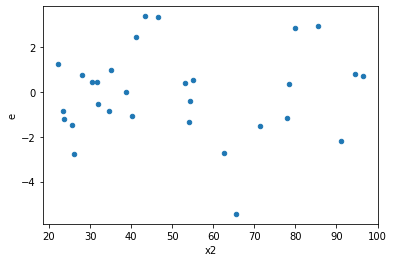

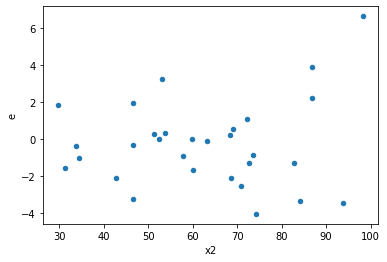

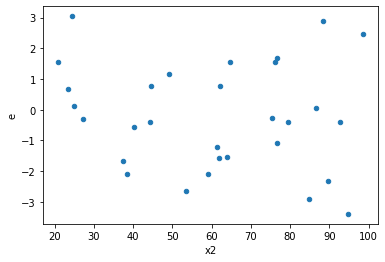

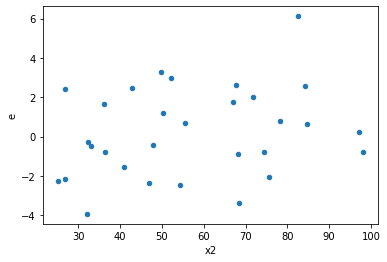

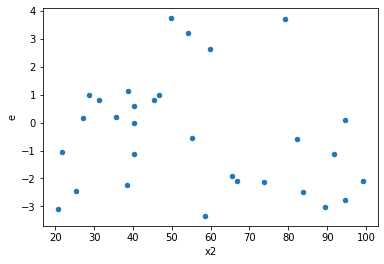

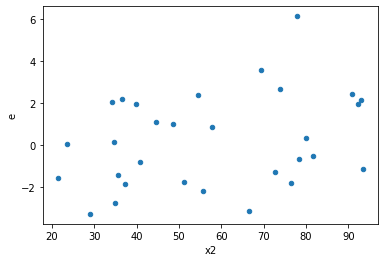

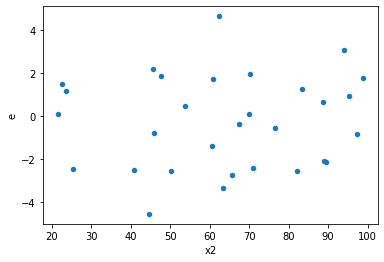

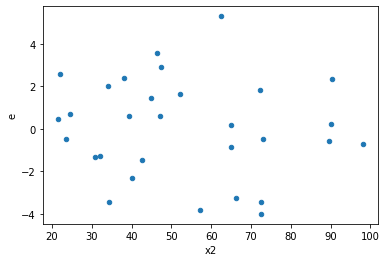

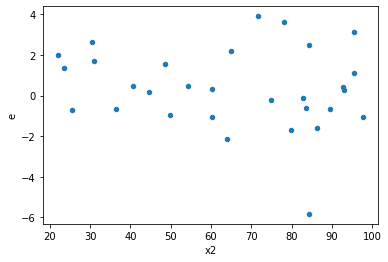

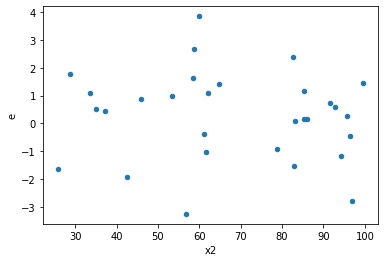

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,13.0,13.0,24.532395729782362,60.83483575187923,1.8871073638294125,4.679602750144556,2.479775576016233,0.11405950485962535,0.9429702475701873,0.057029752429812675,Reject001=1 : Homoscedasticity
2.0,19.0,7.0,34.68007425755819,34.06282081140479,1.8252670661872732,4.866117258772113,2.6659754886920464,0.1888259991368706,0.9055870004315647,0.0944129995684353,Reject001=1 : Homoscedasticity
3.0,15.0,11.0,69.67906504236393,68.4785951110848,4.645271002824262,6.225326828280436,1.3401428731489555,0.6328009973775912,0.6835995013112044,0.3164004986887956,Reject001=1 : Homoscedasticity
6.0,15.0,11.0,57.33281454020756,60.94115315317896,3.822187636013837,5.540104832107178,1.449459147402025,0.5407744117734987,0.7296127941132506,0.27038720588674936,Reject001=1 : Homoscedasticity
11.0,13.0,13.0,83.07987038189569,118.9845938365144,6.390759260145822,9.152661064347262,1.4321711539699618,0.5263688780981162,0.7368155609509419,0.2631844390490581,Reject001=1 : Homoscedasticity
16.0,14.0,12.0,62.609076851395535,64.25476596416631,4.472076917956824,5.3545638303471925,1.1973326775411444,0.7625069956804149,0.6187465021597925,0.38125349784020746,Reject001=1 : Homoscedasticity
19.0,13.0,13.0,27.782781049822898,96.86899744871386,2.137137003832531,7.451461342208758,3.486655899385974,0.032038046772341566,0.9839809766138292,0.016019023386170783,Reject001=1 : Homoscedasticity
20.0,11.0,15.0,31.998531439434693,54.10648100206973,2.908957403584972,3.6070987334713154,1.2399970962194085,0.6842897189754451,0.6578551405122774,0.34214485948772255,Reject001=1 : Homoscedasticity
21.0,11.0,15.0,22.987124994264896,59.065152151534186,2.0897386358422634,3.937676810102279,1.8842915293640103,0.25226838353929426,0.8738658082303529,0.12613419176964713,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,12.0,68.02210029982942,35.77872624885391,4.858721449987816,2.9815605207378257,0.6136512560820506,0.38071805767015765,Reject001=1 : Homoscedasticity
1.0,13.0,13.0,24.532395729782362,60.83483575187923,1.8871073638294125,4.679602750144556,2.479775576016233,0.11405950485962535,Reject001=1 : Homoscedasticity
2.0,19.0,7.0,34.68007425755819,34.06282081140479,1.8252670661872732,4.866117258772113,2.6659754886920464,0.1888259991368706,Reject001=1 : Homoscedasticity
3.0,15.0,11.0,69.67906504236393,68.4785951110848,4.645271002824262,6.225326828280436,1.3401428731489555,0.6328009973775912,Reject001=1 : Homoscedasticity
4.0,17.0,9.0,58.73879101418183,24.899811710786263,3.4552230008342253,2.766645745642918,0.8007140913842441,0.6613697622504716,Reject001=1 : Homoscedasticity
5.0,11.0,15.0,76.38147881360877,52.10640325727309,6.943770801237161,3.473760217151539,0.5002699997719718,0.25036050902583173,Reject001=1 : Homoscedasticity
6.0,15.0,11.0,57.33281454020756,60.94115315317896,3.822187636013837,5.540104832107178,1.449459147402025,0.5407744117734987,Reject001=1 : Homoscedasticity
7.0,11.0,15.0,83.79678285643398,53.04718043751199,7.617889350584907,3.5364786958341328,0.4642334028601504,0.20345964336028893,Reject001=1 : Homoscedasticity
8.0,14.0,12.0,79.4289547919504,27.381590287504267,5.673496770853601,2.2817991906253554,0.40218568596841725,0.10692668904731775,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      979
Reject001=0 : Heteroscedasticity     21
Name: Result_test, dtype: int64